<a href="https://colab.research.google.com/github/AdrianSosaUV/ProgramacionEstadistica/blob/master/2do_Examen_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2do Examen Parcial

### Configuración

In [0]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sb 
sb.set_palette("deep", desat=.6)
sb.set_context(rc={"figure.figsize": (8, 4)})

In [0]:
# en esta celda ponga las funciones a utilizar

def randnum(min, max):
	range = max-min
	choice = np.random.uniform(0,1)
	return min + range*choice

def MonteCarlo(Fx, min, max, smp=5000):
	"""
	Esta función realiza el metodo montecarlo puro.
	Args:
	- Fx  : función a evaluar
	- min : valor minimo
	- max : valor maximo
	- smp : numero de muestras
	"""
	suma = 0
	for i in range(smp):
		x = randnum(min, max)
		suma += Fx(x)

	estimacion = (max - min)*float(suma/smp)

	# promedio de cuadrados
	running_total = 0
	for i in range(smp):
		x = randnum(0, max)
		running_total += pow(Fx(x),2)
	sumSqs = running_total*max / smp
	
	# cuadrado del promedio
	running_total = 0
	for i in range(smp):
		x = randnum(0, max)
		running_total = Fx(x)
	sqs_ave = pow((max*running_total/smp),2)
	
	varianza = sumSqs - sqs_ave
	error = math.sqrt(varianza/smp)
	return {"estimation":estimacion,"variance":varianza,"error":error}

def congruencia(seed, a, c, m):
	"""
	Argumentos:
	seed -	semilla, numero inicial
	a 	 -	multiplicador constante
	c    -	incremento
	m    - 	modulo

	devuelve:
	aleatorio
	"""
	X0 = (a*seed+c) % m
	return X0/m  

def fibonachi(a=0, b=1, N=10, lim=float("inf")):
    
    "a-Numero inicial, b-Numero secuencial, N-Longitud de la secuencia, Lim-Limite de la secuencia"

    n = 0
    queue = []
    while n < N:
        if b < lim:
            queue.append(a)
        else:
            break
        a, b = b, a + b
        n += 1
    return queue

def cuadrado(num, iter = 20):

	memory = []
	i = 0
	while i < iter:
		new = pow(num,2)
		news = str(new)
		longitud = len(news)
		if longitud >= 5:
			bound = math.floor((longitud - 4)/2)
			verifica = bound % 2
			if not(verifica == 0):
				bound += 1
			news = news[bound:bound + 4]
			if news == "0000" or news == "0":
				return memory[-1]
				break
			if not(news in memory):
				memory.append(news)
				num = int(news)
			else:
				break
		else:
			num = pow(num,2)
		i += 1
	return num

class Distribuciones():
	def Histograma(self, data, box=20):
		"""Histograma
		es una representación gráfica de una variable en forma de barras, 
		donde la superficie de cada barra es proporcional a la frecuencia 
		de los valores representado
		"""

		count, box, ignore = plt.hist(data, box)

	def MProbabilidad(self, x, x1, n, n1, p, p1, str='--'):
		"""Función de Masa de Probabilidad
		Asocia a cada punto de su espacio muestral X la probabilidad 
	de que ésta lo asuma.
		"""

		fmp = stats.binom.pmf(x, n, p) # Función de Masa de Probabilidad
		fmp1 = stats.binom.pmf(x1, n1, p1) # Función de Masa de Probabilidad
		plt.plot(x, fmp, str )
		plt.plot(x1, fmp1)
		plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
		plt.vlines(x1, 0, fmp1, colors='g', lw=5, alpha=0.5)

	def DAcumulada(self, x, x1, n, p, str='--'):
		"""Función de Distribución Acumulada
		 Relaciona los valores con su correspondiente percentil; 
		 Describe la probabilidad de que una variable aleatoria X 
		 sujeta a cierta ley de distribución de probabilidad se sitúe 
		 en la zona de valores menores o iguales a x.
		 """

		fda_binom = stats.binom.cdf(x, n, p)			#Función de distribución acumulada binomial
		fda_normal = stats.norm(10, 1.2).cdf(x1)		#Función de distribución acumulada normal
		plt.plot(x, fda_binom, str, label='FDA binomial')
		plt.plot(x1, fda_normal, label='FDA nomal')
		plt.legend(loc=4)

	def DProbabilidad(self, x):
		"""Función de Densidad de Probabilidad
		Derivada de la Función de Distribución Acumulada
		"""
		
		FDP = stats.norm(10, 1.2).pdf(x)
		plt.plot(x, FDP, label='FDP normal')
		
	def Poisson(self, x, fun, str='--'):
		"""Distribución de Poisson
		La Distribución Poisson describe la probabilidad de encontrar exactamente r eventos 
		en un lapso de tiempo si los acontecimientos se producen de forma independiente a 
		una velocidad constante μ.
		"""

		fmp = fun.pmf(x) 
		plt.plot(x, fmp, str)
		plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)

	def Binomial(self, x, fun, str='--'):
		"""Distribución Binomial
		Describe la probabilidad de exactamente 'r' éxitos en 'N' 
		pruebas si la probabilidad de éxito en una sola prueba es 'p'.
		"""

		fmp = fun.pmf(x) 
		plt.plot(x, fmp, str)
		plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)

	def Geometrica(self, x, fun, str='--'):
		"""Distribución Geometrica
		Expresa la probabilidad de tener que esperar exactamente 'r' pruebas
		hasta encontrar el primer éxito si la probabilidad de éxito en una sola prueba es 'p'.
		"""

		fmp = fun.pmf(x) 
		plt.plot(x, fmp, str)
		plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)

	def HGeometrica(self, x, fun, str='--'):
		"""Distribución Hiper Geometrica
		Describe experimentos en donde se seleccionan los elementos al azar sin reemplazo
		(se evita seleccionar el mismo elemento más de una vez).
		"""

		fmp = fun.pmf(x) # Función de Masa de Probabilidad
		plt.plot(x, fmp, str)
		plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)

	def Bernoulli(self, x, fun, str='bo'):
		"""Distribución de Bernoulli
		Describe un experimento probabilístico en donde el ensayo tiene dos posibles resultados, éxito o fracaso.
		"""

		fmp = fun.pmf(x) 
		fig, ax = plt.subplots()
		ax.plot(x, fmp, str)
		ax.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
		ax.set_yticks([0., 0.2, 0.4, 0.6])

	
	def Normal(self, x, fun):
		"""distribución de Normal 
		tambien llamada distribución de Gauss
		"""
		
		fp = fun.pdf(x) # Función de Probabilidad
		plt.plot(x, fp)

	def Uniforme(self, x, fun, str='--'):
		"""Distribución Uniforme"""

		fp = fun.pdf(x) # Función de Probabilidad
		fig, ax = plt.subplots()
		ax.plot(x, fp, str)
		ax.vlines(x, 0, fp, colors='b', lw=5, alpha=0.5)
		ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8, 1., 1.2])

	def LogN(self, x, fun):
		"""Distribución Log-Normal"""

		fp = fun.pdf(x) # Función de Probabilidad
		plt.plot(x, fp)

	def Exponencial(self, x, fun):
		"""Funcion Exponencial"""

		fp = fun.pdf(x) # Función de Probabilidad
		plt.plot(x, fp)

	def Plot(self, title, ylabel, xlabel):
		"""Función complementaria de graficación"""
		plt.ylabel(ylabel)
		plt.xlabel(xlabel)
		plt.title(title)
		plt.grid()	
		plt.show()

## Ejercicio 1

Obtener la estimacion de las siguientes ecuaciones y mostrar el error en cada una de ellas:

* x^2 + 3 * x + 2

* 2 * x + 3

* x^5 + 10

In [0]:
def f1(x):
  return pow(x,2)+ (3* x +2)

def f2(x):
  return 2*x +3

def f3(x):
  return pow(x,5) + 10

In [10]:
f01 = MonteCarlo(f1,0,5)
f02 = MonteCarlo(f2,-5,5)
f03 = MonteCarlo(f3,-1,1)

print(" estimación de la ecuacion1: {} error: {}".format(f01["estimation"],f01["error"]))
print(" estimación de la ecuacion2: {} error: {}".format(f02["estimation"],f02["error"]))
print(" estimación de la ecuacion3: {} error: {}".format(f03["estimation"],f03["error"]))

 estimación de la ecuacion1: 89.6930451717817 error: 0.6701829786583481
 estimación de la ecuacion2: 29.181468495062823 error: 0.2690212771558107
 estimación de la ecuacion3: 20.00541646625205 error: 0.1437888717926324


## ejercicio 2

Genere todos los numeros aleatorios con las siguientes configuraciones por los tres metodos( cuadrados, Fibonacci y congruencia):

congruencia

* seed = 1968, 1993, 1600, 1005
* c = 7, 5, 13
* k = 18, 75, 12
* g = 5, 7, 3

fibonacci
* a = 7, 5, 13
* b = 18, 75, 12

cuadrados
* seed = 1968, 1993, 1600, 1005

In [13]:
seed = [1968, 1993, 1600, 1005]
c = [7, 5, 13]
k = [18, 75, 12]
g = [5, 7, 3]
for i in seed:
  for j in c:
    for K in k:
      for l in g:
        print(congruencia(i,j,K,l))

0.8
0.5714285714285714
0.0
0.2
0.7142857142857143
0.0
0.6
0.7142857142857143
0.0
0.6
0.2857142857142857
0.0
0.0
0.42857142857142855
0.0
0.4
0.42857142857142855
0.0
0.4
0.42857142857142855
0.0
0.8
0.5714285714285714
0.0
0.2
0.5714285714285714
0.0
0.8
0.5714285714285714
0.3333333333333333
0.2
0.7142857142857143
0.3333333333333333
0.6
0.7142857142857143
0.3333333333333333
0.6
0.14285714285714285
0.6666666666666666
0.0
0.2857142857142857
0.6666666666666666
0.4
0.2857142857142857
0.6666666666666666
0.4
0.8571428571428571
0.3333333333333333
0.8
0.0
0.3333333333333333
0.2
0.0
0.3333333333333333
0.6
0.5714285714285714
0.3333333333333333
0.0
0.7142857142857143
0.3333333333333333
0.4
0.7142857142857143
0.3333333333333333
0.6
0.42857142857142855
0.6666666666666666
0.0
0.5714285714285714
0.6666666666666666
0.4
0.5714285714285714
0.6666666666666666
0.6
0.0
0.3333333333333333
0.0
0.14285714285714285
0.3333333333333333
0.4
0.14285714285714285
0.3333333333333333
0.6
0.5714285714285714
0.0
0.0
0.714285

In [17]:
a = [7, 5, 13]
b = [18, 75, 12]

for i in a:
  for j in b:
    print(fibonachi(i,j)[-1])


759
2697
555
717
2655
513
885
2823
681


In [20]:
seed = [1968, 1993, 1600, 1005]
for i in seed:
  print(cuadrado(i))

5523
1778
6000
0400


## Ejercicio 3



### de la siguiente base de datos, responda las siguientes preguntas:

* ¿ cúal fue la temperatura mas baja registrada?
* ¿ cúal fue la temperatura mas alta registrada?
* ¿ cúal es el promedio de temperaturas por año?
* ¿ cúal es la desviación estandar de la velocidad del viento?

realice las distribuciones e histogramas correspondientes de las columnas  **temperatura, sensacion termica, humedad y velocidad del viento**.

In [0]:
data =pd.read_csv("https://raw.githubusercontent.com/AdrianSosaUV/ProgramacionEstadistica/master/london_merged.csv")

In [58]:
data.describe()

,cnt,temperatura,sensacion termica,humedad,velocidad del viento,weather_code,festivo,fin de semana,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [62]:
print("temperatura mas baja registrada:{}".format(data["temperatura"].min()))
print("temperatura mas alta registrada:{}".format(data["temperatura"].max()))
print("promedio de temperaturas:{}".format(data["temperatura"].mean()))
print("desviación estandar de la velocidad del viento:{}".format(data["velocidad del viento"].std()))

temperatura mas baja registrada:-1.5
temperatura mas alta registrada:34.0
promedio de temperaturas:12.468090808162016
desviación estandar de la velocidad del viento:7.894570329361007


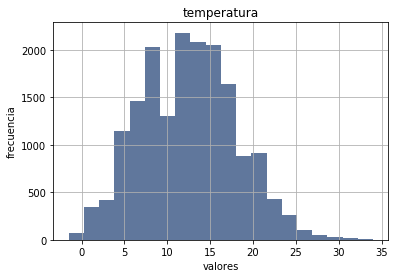

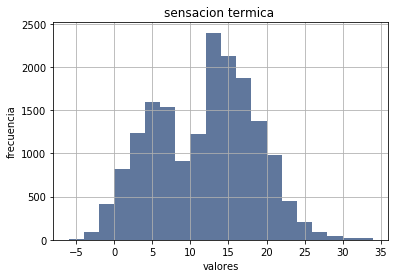

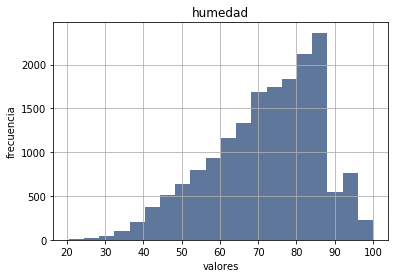

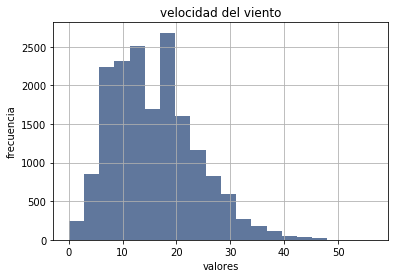

In [61]:
lista = ["temperatura", "sensacion termica ", "humedad","velocidad del viento"]
a = Distribuciones()
for i in lista:
  a.Histograma(data[i])
  a.Plot(i,"frecuencia","valores")